# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
This appears to be a rigorous study. There was a nearly 50/50 split of tests on male-female mice and thousands of data points were the product of testing treatments on 259 mice (several times each). Overall, there were two standouts showing that the treatments of Capomulin and Ramicane signfiticantly reduced tumors compared to the eight other treatments. Those two were also tested the most. More generally, there was a strong correlation where a mouse's weight predicted the tumor size. 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mice_merged = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse_ID"])

# Display the data table for preview
mice_merged.head()

,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
mice_unique = mice_merged.Mouse_ID.unique()
mice_count = len(mice_unique)
mice_count 

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mice_merged.loc[mice_merged.duplicated(subset=["Mouse_ID", "Timepoint"]),"Mouse_ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mice = mice_merged[mice_merged['Mouse_ID'].isin(duplicate_mice)==False]
cleaned_mice.head()

,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [26]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_unique = cleaned_mice.Mouse_ID.unique()
cleaned_micecount = len(cleaned_mice_unique)
cleaned_micecount 

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mouse_mean = cleaned_mice['Tumor Volume (mm3)'].groupby(cleaned_mice['Drug Regimen']).mean()
mouse_median = cleaned_mice['Tumor Volume (mm3)'].groupby(cleaned_mice['Drug Regimen']).median()
mouse_var = cleaned_mice['Tumor Volume (mm3)'].groupby(cleaned_mice['Drug Regimen']).var()
mouse_stdev = cleaned_mice['Tumor Volume (mm3)'].groupby(cleaned_mice['Drug Regimen']).std()
mouse_SEM = cleaned_mice['Tumor Volume (mm3)'].groupby(cleaned_mice['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.

statistical_summary = pd.DataFrame({"Mean Tumor Volume":mouse_mean, 
                            "Median Tumor Volume":mouse_median, 
                           "Tumor Variance":mouse_var, 
                           "Tumor Std Dev":mouse_stdev, 
                           "Tumor Std Err":mouse_SEM})
# Display the Summary statistics table grouped by 'Drug Regimen' column
statistical_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Variance,Tumor Std Dev,Tumor Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


AttributeError: 'numpy.ndarray' object has no attribute 'plot'

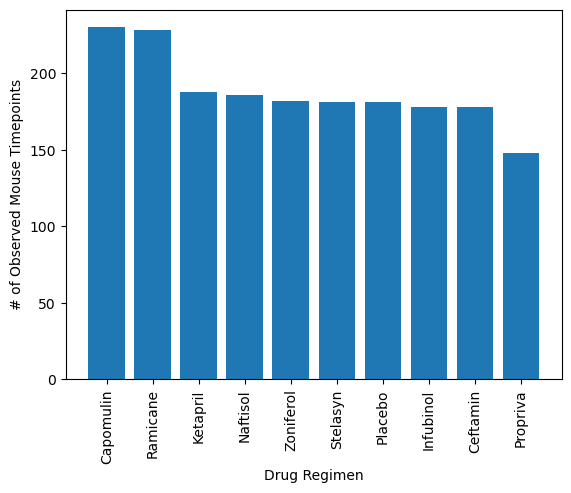

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


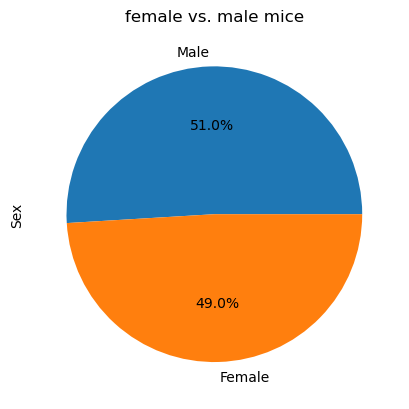

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = cleaned_mice["Sex"].value_counts()
plt.title("female vs. male mice")
mouse_gender.plot.pie(autopct= "%1.1f%%")
plt.show()

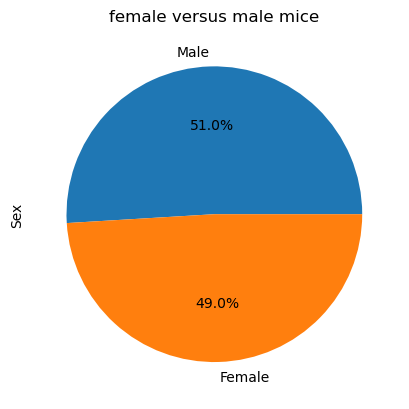

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["female", "male"]
sizes = [50, 50]
plot = mouse_gender.plot.pie(y="Total Count", autopct="%1.1f%%")
plt.title("female versus male mice")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = cleaned_mice.loc[cleaned_mice["Drug Regimen"] == "Capomulin",:]
Ramicane_df = cleaned_mice.loc[cleaned_mice["Drug Regimen"] == "Ramicane", :]
Infubinol_df = cleaned_mice.loc[cleaned_mice["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = cleaned_mice.loc[cleaned_mice["Drug Regimen"] == "Ceftamin", :]


# Start by getting the last (greatest) timepoint for each mouse

Capomulin_last = Capomulin_df.groupby('Mouse_ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, cleaned_mice, on=("Mouse_ID","Timepoint"),how="left")

Ramicane_last = Ramicane_df.groupby('Mouse_ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, cleaned_mice, on=("Mouse_ID","Timepoint"),how="left")

Infubinol_last = Infubinol_df.groupby('Mouse_ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, cleaned_mice, on=("Mouse_ID","Timepoint"),how="left")

Ceftamin_last = Ceftamin_df.groupby('Mouse_ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, cleaned_mice, on=("Mouse_ID","Timepoint"),how="left")


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
cleaned_mice

,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


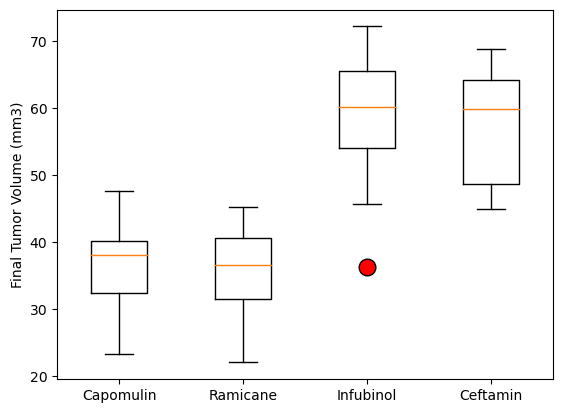

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

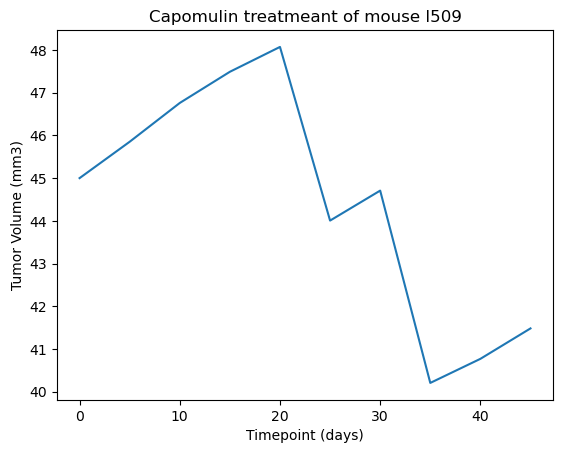

In [14]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse1509_df = Capomulin_df.loc[Capomulin_df["Mouse_ID"] == "l509",]
x_axis = mouse1509_df["Timepoint"]
tumsiz = mouse1509_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')


/var/folders/pq/stl771115hl92n5h5b94rv7c0000gn/T/ipykernel_27673/1689887024.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_capm_vol =Capomulin_df.groupby(["Mouse_ID"]).mean()


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

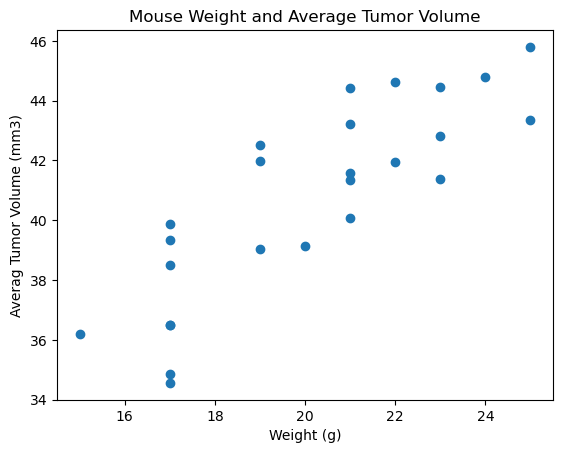

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin_df.groupby(["Mouse_ID"]).mean()

marker_size=15
plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol['Tumor Volume (mm3)'])
plt.title('Mouse Weight and Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


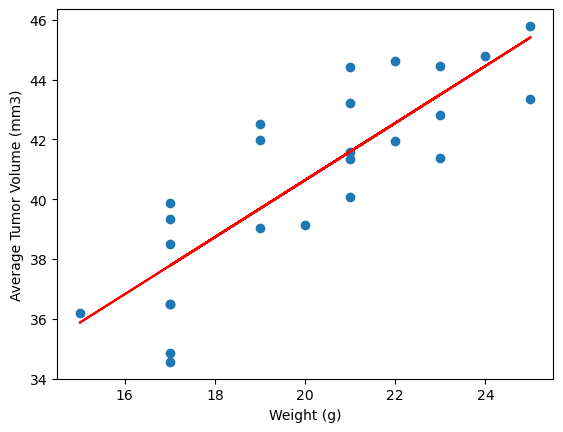

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
